# Roteiro Experimental para o experimento "Balança de corrente"

Você deve responder as perguntas abaixo preenchendo as células com texto ( _Markdown_ ) quando solicitado a explicar alguma coisa e usar as células de codigo ( _Code_ ) quando for solicitado cálculos, valores, estimativas e gráficos. Quando usar células de código use o símbolo "#" para comentar o que foi feito sempre que julgar necessário.

**Lembre-se de seguir o método de análise que lhe foi sorteado pelo professor!**

## 0. Identificação

### nome completo:
Guilherme Fortes Evangelista
### RA:
21062515
### e-mail institucional:
g.fortes@aluno.ufabc.edu.br

## 1. Objetivos do experimento

Descreva na célula abaixo em um único parágrafo qual é o seu entendimento sobre os objetivos deste experimento (não se esqueça de acionar o modo _Markdown_ ):

O objetivo do experimento é estudar e verificar a fórmula para a força magnética de um fio no qual passa corrente e está sobre um campo magnético.

## 2. Descreva sucintamente a física do experimento e os resultados esperados 

Use as fórmulas que julgar necessárias. Procure ser sucinto ($\sim$2 parágrafos).

A força magnética $\mathbf{F}_m$ que age sobre um fio de comprimento $L$ dentro de um campo magnético $\mathbf{B}$ e com corrente $I$ é escrita como:
$$\mathbf{F}_m=I\mathbf{L}\times\mathbf{B}$$

Para um fio perpendicular às linhas de campo, a intensidade da força é dada por:
$$F_m=ILB$$
no qual a força é perpendicular tanto a $\mathbf{L}$ quanto a $\mathbf{B}$ e no caso do experimento, aponta para baixo, de forma a pressionar a balança.

## 3. Descreva o arranjo experimental

Liste os equipamentos e materiais usados no experimento, bem como a montagem dos diversos componentes.

Lista de materiais:

* bobina dupla
* fio de cobre retilíneo;
* fontes de alimentação DC;
* Balança digital;
* Medidor de campo magnético com sonda Hall;
* Multímetro.

O fio é colocado de forma que passe perpendicular às linhas de campo gerado pela bobina dupla, dentro dessa. Uma fonte é colocada de forma a gerar corrente no fio e outra é colocada para gerar corrente na bobina. O fio ainda é posto em um suporte em cima da balança com o multímetro medindo sua corrente pelos terminais. O medidor de tesla é colocado para medir o campo dentro da bobina através da sonda Hall que é inserida na região indicada.

## 4. Descreva o procedimento experimental

Como foram foram usados os equipamentos, quais parâmetros foram variados e de que forma, quais dados foram tomados e as tabelas de dados.

Na primeira tarefa, com o campo magnético constante, a corrente foi variada pela fonte de corrente e os dados da força medida foram tomados da balança. Os valores de corrente anotados foram os que provocaram o aumento do dígito menos significativo da balança. Os dados tomados são apresentados na célula abaixo.

In [65]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import statsmodels.api as sm

dados1=pd.read_csv("Notebooks/FxI.csv")

I=np.array(dados1['I (mA)'])
uI=np.array(dados1['uI (mA)'])
F1=np.array(dados1['F (N)'])
uF1=np.array(dados1['uF (N)'])

dados1

,I (mA),uI (mA),F (N),uF (N)
0,1.207,0.014,0.01,0.002
1,1.690,0.016,0.02,0.002
2,2.278,0.018,0.03,0.002
3,2.623,0.019,0.04,0.002
4,3.424,0.022,0.05,0.002
5,3.933,0.024,0.06,0.002
6,4.497,0.026,0.07,0.002
7,5.198,0.028,0.08,0.002
8,5.777,0.030,0.09,0.002


Para a segunda tarefa, a corrente foi mantida constante e o valor do campo magnético foi alterado através da fonte de corrente. Os valores de campo anotados com o medidor de Tesla, foram os que provocaram o aumento do dígito menos significativo da balança. Os valores de força foram anotados a partir da balança novamente. Os dados são apresentados abaixo.

In [66]:
dados2=pd.read_csv("Notebooks/FxB.csv")

B=np.array(dados2['B (mT)'])
uB=np.array(dados2['uB (mT)'])
F2=np.array(dados2['F (N)'])
uF2=np.array(dados2['uF (N)'])

dados2

,B (mT),uB (mT),F (N),uF (N)
0,52,2,0.01,0.002
1,97,2,0.02,0.002
2,121,2,0.03,0.002
3,150,2,0.04,0.002
4,207,2,0.05,0.002
5,241,2,0.06,0.002
6,288,2,0.07,0.002
7,319,2,0.08,0.002
8,346,2,0.09,0.002


## 5. Faça um gráfico dos dados "brutos"

Por "brutos" entenda "assim como foram anotados". Neste experimento são esperados dois gráficos deste tipo. (Use _Code cell_ )

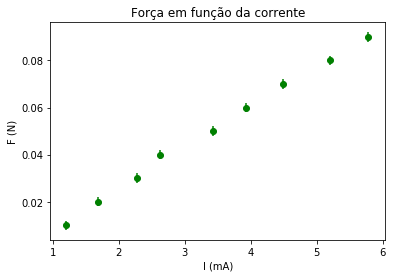

In [67]:
plt.figure() 
plt.errorbar(I, F1, uF1, uI,'og')
plt.title("Força em função da corrente")
plt.xlabel("I (mA)")
plt.ylabel("F (N)")
plt.show()

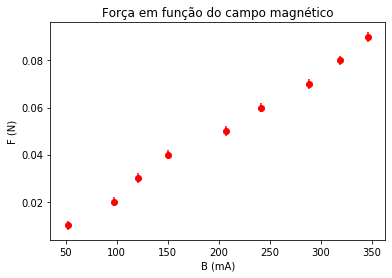

In [68]:
plt.figure() 
plt.errorbar(B, F2, uF2, uB,'or')
plt.title("Força em função do campo magnético")
plt.xlabel("B (mA)")
plt.ylabel("F (N)")
plt.show()

## 6. Faça a transferência de incertezas da _variável x_ para a _variável y_.

Neste experimento há dois conjuntos de dados a serem analisados. Seguindo o _template_ de _notebook_ apresentado no _moodle_ responda na próxima célula ( _markdown_ ) se as incertezas da variável correspondente ao _eixo x_ precisam ser transferidas para a variável correspondente ao _eixo y_ em cada um dos conjuntos de dados. Justifique a sua resposta com argumentos _semi-quantitativos_. Se for necessária a transferência adicione as células ( _code_ ) necessárias à operação de transferência (lembrete: para adicionar uma célula nova clique em "+" no menu do _notebook_ e clique nas flechas se precisar reposicionar células) 

In [69]:
Ilin = sm.add_constant(I)
reglin1 = sm.OLS(F1,Ilin)
reglin_dat1 = reglin1.fit()
ajuste1 = reglin_dat1.params

Blin = sm.add_constant(B)
reglin2 = sm.OLS(F2,Blin)
reglin_dat2 = reglin2.fit()
ajuste2 = reglin_dat2.params

print("a1=",ajuste1[1],"; a2=", ajuste2[1])

a1= 0.01730464957784107 ; a2= 0.000263127350387669


O produto dos coeficientes angulares pelas suas respectivas incertezas de corrente e de campo resultam em ordens de grandeza menores que as incertezas na força medida, de forma que são desprezíveis. Assim, a transferência de incertezas pode ser desconsiderada.

## 7. Faça os ajustes de reta minimizando $\chi^2_{red}$
Faça o ajuste de retas usando as incertezas da variável correspondente ao _eixo y_ (após a transferência das incertezas em x). Imprima os resultados dos parâmetros ajustados no formato $a\pm\sigma_a$ com os algarismos significativos apropriados.

a1= 0.0173 +/- 0.00031 	 b1= -0.0089 +/- 0.0014


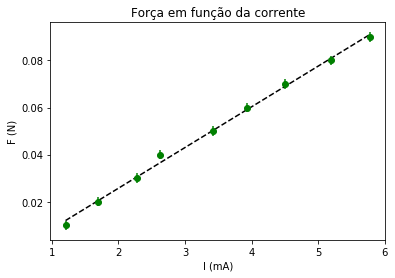

In [70]:
w1 = 1/(uF1**2)
reglinw1 = sm.WLS(F1,Ilin,w1)
result1 = reglinw1.fit()
fitpars1 = result1.params
fiterrs1 = result1.HC0_se

a1=np.round(fitpars1[1],5)
ua1=np.round(fiterrs1[1],5)
b1=np.round(fitpars1[0],4)
ub1=np.round(fiterrs1[0],4)

print("a1=",a1, "+/-", ua1,"\t","b1=", b1, "+/-", ub1)

xline = I
yline = a1*I+b1
plt.errorbar(I, F1, uF1,0,'og')
plt.title("Força em função da corrente")
plt.xlabel("I (mA)")
plt.ylabel("F (N)")
plt.plot(xline, yline, 'k--')

a2= 0.0002631 +/- 6e-06 	 b2= -0.0032 +/- 0.0014


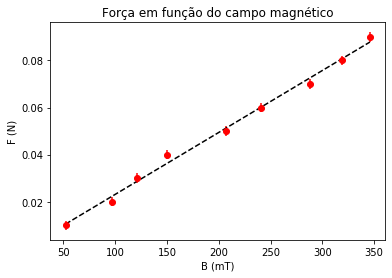

In [71]:
w2 = 1/(uF2**2)
reglinw2 = sm.WLS(F2,Blin,w2)
result2 = reglinw2.fit()
fitpars2 = result2.params
fiterrs2 = result2.HC0_se

a2=np.round(fitpars2[1],7)
ua2=np.round(fiterrs2[1],7)
b2=np.round(fitpars2[0],4)
ub2=np.round(fiterrs2[0],4)

print("a2=",a2, "+/-", ua2,"\t", "b2=", b2, "+/-", ub2)

xline = B
yline = a2*B+b2
plt.errorbar(B, F2, uF2,0,'or')
plt.title("Força em função do campo magnético")
plt.xlabel("B (mT)")
plt.ylabel("F (N)")
plt.plot(xline, yline, 'k--')

## 8. Determine a qualidade dos ajustes

Na próxima célula ( _code_ ) calule o $\chi^2_{red}$ de ambos os ajustes. Na célula seguinte ( _code_ novamente) faça um gráfico de resíduos e na terceira célula a seguir ( _markdown_ ) discuta a qualidade do ajuste.

In [72]:
invpars1 = fitpars1[1],fitpars1[0]
F1hat = np.polyval(invpars1, I)
chi_squared1 = np.sum(((F1hat - F1)/uF1) ** 2)
print(chi_squared1)
chi2_red1 = chi_squared1/(len(I)-2)
chi2_red1

5.224369466088062


0.7463384951554374

In [73]:
invpars2 = fitpars2[1],fitpars2[0]
F2hat = np.polyval(invpars2, B)
chi_squared2 = np.sum(((F2hat - F2)/uF2) ** 2)
print(chi_squared2)
chi2_red2 = chi_squared2/(len(B)-2)
chi2_red2

8.725741677886623


1.2465345254123747

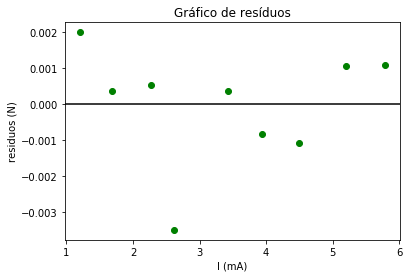

In [74]:
resid1 = F1hat - F1
plt.plot(I, resid1, 'og')
plt.title("Gráfico de resíduos")
plt.xlabel("I (mA)")
plt.ylabel("residuos (N)")
plt.axhline(y=0, color='k', linestyle='-')

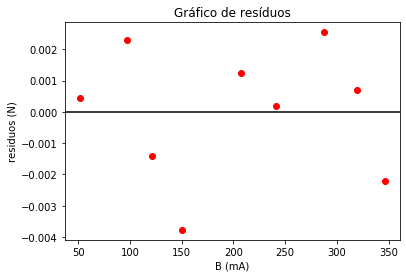

In [75]:
resid2 = F2hat - F2
plt.plot(B, resid2, 'or')
plt.title("Gráfico de resíduos")
plt.xlabel("B (mA)")
plt.ylabel("residuos (N)")
plt.axhline(y=0, color='k', linestyle='-')

Ambos os valores de $\chi^2_{red}$ são próximo de 1, indicando bons ajustes, com o primeiro estando abaixo, indicando uma ligeira superstimação das incertezas enquanto o segundo está acima, indicando uma pequena subestimação das incertezas.

## 9. Interprete os resultados dos ajustes

Os ajustes lineares são do tipo $y = ax + b$. Qual é o significado físico dos parâmetros $a$ e $b$? Os valores dos parâmetros ajustados (consideradas as incertezas) são compatíveis com o esperado?

Pela fórmula dada acima, os coeficientes lineares representam
$$a_1=BL$$
$$a_2=IL$$

Assim, os valores encontrados estão de acordo com o esperado como será mostrado abaixo.

## 10. Obtenha valores experimentais a partir dos ajustes

### 13.1. Calcule L (primeira versão)

Do ajuste aos dados de variação de corrente (com campo fixo) obtenha o valor do comprimento do fio $L$ imerso no campo magnético e sua incerteza a partir do coeficiente angular do ajuste. Propague a incerteza vinda do ajuste.


In [63]:
L1=a1/0.337
uL1=L1*np.sqrt((ua1/a1)**2+(1/337)**2)
print("L1=(",L1,"+/-",uL1,") m")

L1=( 0.05133531157270029 +/- 0.0009324087822343092 ) m


### 13.2. Calcule L (segunda versão)

Do ajuste aos dados de variação de campo magnético (com corrente fixa) obtenha o valor do comprimento do fio $L$ imerso no campo magnético e sua incerteza a partir do coeficiente angular do ajuste. Propague a incerteza vinda do ajuste.


In [64]:
L2=a2/0.004927
uL2=L2*np.sqrt((ua2/a2)**2+(0.039/4.927)**2)
print("L2=(",L2,"+/-",uL2,") m")

L2=( 0.053399634666125434 +/- 0.001289051044165888 ) m


### 13.3. Compare os resultados

Compare os resultados de 13.1 e 13.2 e à luz das incerteza argumente se são compatíveis entre si e compatíveis com o valor de $L$ medido diretamente no arranjo experimental.

In [76]:
E=(L2-L1)/np.sqrt(uL1**2+uL2**2)
E

1.2975624691837273

O erro normalizado acima indica que ambos os valores são compatíveis entre si para até 2 sigmas de incerteza. Para o valor L = (0,03650 $\pm$ 0,00005) m, no qual o campo cai pela metade, o valor ainda está aceitável e pode ser considerado compatível.